# Máquina de Vectores de Soporte de Regresión

En este notebook se realizará la creación del modelo de Máquina de Vectores de Soporte de Regresión, siguiendo los pasos definidos en la documentación para la creación de modelos de regresión

In [38]:
import sklearn.model_selection as ms
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import feather
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
%matplotlib inline


In [39]:
pingfInfoFilePath = './data/dv_personas_190411_abt'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creación de variables ficticias

#### Se procede a crear las variables ficticias de las diferentes variables categóricas del dataset

In [40]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [41]:
dv_personas_190411_model_one_hot = pd.get_dummies(data=dv_personas_190411_model,columns=categoricalCols)

In [42]:
dv_personas_190411_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
dv_personas_190411_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Modelo de SVR con tabla ABT1

### Escalado de características

In [44]:
dv_personas_190411_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_model_one_hot)
dv_personas_190411_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_model_one_hot_scaler,columns=dv_personas_190411_model_one_hot.columns)
dv_personas_190411_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.000000,0.232323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.135135,0.282828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.081081,0.212121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.373737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.297297,0.787879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### División de los datos en características y variable objetivo

In [45]:
Features_1_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,2:]
Labels = dv_personas_190411_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [47]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [48]:
Labels = np.array(Labels)
Labels[:10]

array([0.23232323, 0.28282828, 0.21212121, 0.37373737, 0.78787879,
       0.2020202 , 0.34343434, 0.77777778, 0.13131313, 0.65656566])

### Búsueda de mejores híper-parámetros para el modelo

In [37]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma':[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc.fit (Features,Labels)
print(gsc.best_estimator_.C)
print(gsc.best_estimator_.epsilon)
print(gsc.best_estimator_.gamma)

1
0.1
0.005


### Evaluación del modelo a través del método de validación cruzada

In [12]:
nr.seed(498)
cv_estimate = ms.cross_val_score(gsc, Features, Labels)
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = -0.044
SDT of the metric       = 0.004
Outcomes by cv fold
Fold  1    -0.043
Fold  2    -0.040
Fold  3    -0.042
Fold  4    -0.050
Fold  5    -0.046


### División de los datos en datos de prueba y entrenamiento

In [49]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features,Labels,test_size=0.20, random_state=42)

### Entrenamiento del modelo

In [50]:
best_params = gsc.best_params_
best_svr = SVR(C=1, cache_size=200, coef0=0.1, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
best_svr.fit(x_train,y_train)

SVR(C=1, cache_size=200, coef0=0.1, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
best_params = gsc.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
best_svr.fit(x_train,y_train)

SVR(C=1, cache_size=200, coef0=0.1, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
y_score = best_svr.predict(x_test)
y_score

array([0.29870379, 0.28650994, 0.30204486, ..., 0.21566213, 0.30902807,
       0.21678369])

### Evaluación del modelo

In [22]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)*1000))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))*100))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)*100))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)*100))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
print_metrics(y_test, y_score,28)

Mean Square Error      = 45.92235183320687
Root Mean Square Error = 21.42950112186629
Mean Absolute Error    = 16.997947167921325
Median Absolute Error  = 14.488157312047562
R^2                    = 0.07371623113011161
Adjusted R^2           = 0.06489759158163241


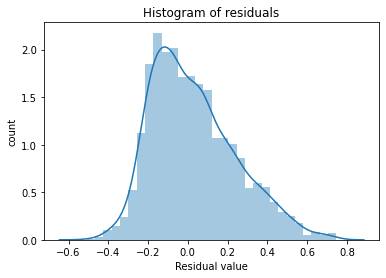

In [17]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)   

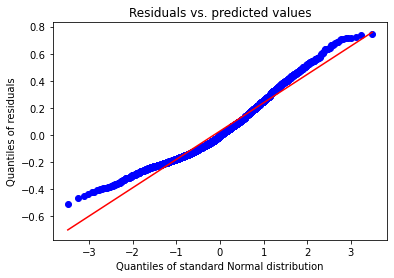

In [21]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(y_test, y_score)  

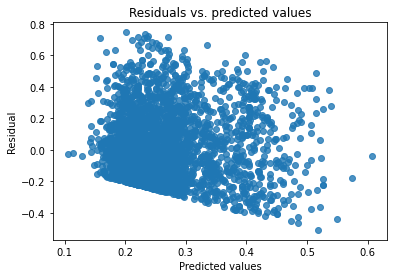

In [18]:
def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 